In [2]:
import requests
import json
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns',100)
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [181]:
# import the csv file that has all of our collected data from the two NHL APIs
df = pd.read_csv('Final_NHL_stats.csv')

In [182]:
# set the index to our unique team/season IDs
df.set_index('teamID_seasonID',inplace=True)

In [183]:
# drop columns that are repeated from the two API calls (regular season and defense stats)
df.drop(columns=['Unnamed: 0','wins_y','shootingPctg_y','ot','losses_y','faceoffsLost','faceoffsWon',
                 'faceoffWinPctg','faceoffs','gamesPlayed_y'],axis=1, inplace = True)

In [186]:
# create a new column to reflect a team's win percentage for the season
# this will be our target variable for our OLS model
df['win_percentage']=df['wins_x']/df['gamesPlayed_x']

In [ ]:
#histogram and normal probability plot of our target variable to see distribution
sns.distplot(df['win_percentage'], fit=norm, bins=20, kde=False);
fig = plt.figure()
res = stats.probplot(df['win_percentage'], plot=plt)

In [ ]:
# create a list of independent variables
features = list(df.columns.values)

In [ ]:
#break the colums into groups to plot 4 on a row at a time
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

In [ ]:
# create scatter plots for every independent variable vs. our target variable
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['win_percentage'],x_vars=i, kind="reg", height=3)

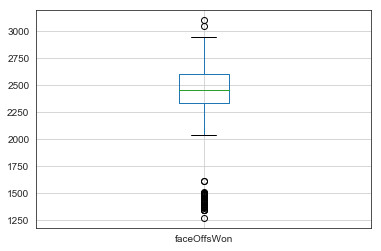

In [191]:
# investigate distribution of specific variable which seems to have outliers
df.boxplot(['faceOffsWon'])

In [196]:
# find the rows associated with the identified outliers 
df[(df['faceOffsWon']>1200) & (df['faceOffsWon']<1600)]

,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,giveaways,goalsFor,hits,missedShots,otLosses,points,shotsFor,takeaways,teamAbbrev,teamFullName,ties,win_percentage
teamID_seasonID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_20122013,0.8553,48.2,1440.0,2779.0,1339.0,48,2.542,2.292,19,81.1,28.0,32.0,176.0,15.9,50.0,48,0.890,8.1,23.1250,28.3750,0.727,0.750,0.172,0.457,0.250,0.737,19,515,334,110,892,558,10,48,1362,297,NJD,New Jersey Devils,0,0.395833
2_20122013,0.9792,49.7,1385.0,2754.0,1369.0,48,2.833,2.813,17,80.3,31.0,28.0,156.0,19.9,57.3,55,0.899,9.1,28.1667,30.9375,0.813,0.842,0.280,0.556,0.400,0.739,24,766,475,135,1018,526,7,55,1485,382,NYI,New York Islanders,0,0.500000
3_20122013,1.3000,50.0,1410.0,2820.0,1410.0,48,2.250,2.625,18,81.1,24.0,28.0,153.0,15.7,58.3,56,0.920,8.5,28.1875,30.8958,0.929,1.000,0.296,0.556,0.524,0.857,26,773,334,126,1413,566,4,56,1483,271,NYR,New York Rangers,0,0.541667
4_20122013,0.8646,48.5,1493.0,2901.0,1408.0,48,2.896,2.750,22,85.9,37.0,26.0,171.0,21.6,51.0,49,0.899,9.5,28.5625,29.0417,0.765,0.850,0.227,0.520,0.450,0.692,23,784,382,132,1316,521,3,49,1394,255,PHI,Philadelphia Flyers,0,0.479167
5_20122013,1.3544,51.5,1404.0,2893.0,1489.0,48,2.479,3.375,12,79.6,42.0,34.0,170.0,24.7,75.0,72,0.915,11.3,29.2292,29.9583,0.840,0.950,0.647,0.808,0.700,0.806,36,735,298,162,1229,547,0,72,1438,227,PIT,Pittsburgh Penguins,0,0.750000
7_20122013,0.9011,46.2,1558.0,2898.0,1340.0,48,2.896,2.458,21,79.2,23.0,37.0,163.0,14.1,50.0,48,0.913,8.8,33.4583,27.8958,0.600,0.692,0.208,0.333,0.500,0.667,21,718,385,118,1079,460,6,48,1339,300,BUF,Buffalo Sabres,0,0.437500
8_20122013,1.2532,49.8,1514.0,3013.0,1499.0,48,2.583,3.042,14,79.8,42.0,35.0,203.0,20.7,65.6,63,0.904,9.9,26.9375,30.5833,0.789,0.810,0.421,0.606,0.600,0.724,29,702,394,146,1067,580,5,63,1468,260,MTL,Montréal Canadiens,0,0.604167
9_20122013,1.0270,49.1,1469.0,2889.0,1420.0,48,2.083,2.333,17,88.0,25.0,20.0,157.0,15.9,58.3,56,0.933,7.0,31.2917,33.1458,0.667,0.905,0.304,0.500,0.500,0.720,25,616,400,112,1307,598,6,56,1591,312,OTT,Ottawa Senators,0,0.520833
10_20122013,1.0500,50.0,1474.0,2951.0,1477.0,48,2.667,3.021,17,87.9,31.0,19.0,166.0,18.7,59.4,57,0.917,11.5,32.2708,26.3333,0.727,0.870,0.438,0.417,0.583,0.594,26,826,554,145,1626,547,5,57,1264,329,TOR,Toronto Maple Leafs,0,0.541667


In [197]:
# remove the rows shown above which refer to a season which had a partial lockout
# as these values do not reflect a standard regular season in the NHL

ixl = list(df.index)
lockout = [i for i in ixl if '20122013' in i]
df.drop(index=lockout,axis=0,inplace=True)

In [3]:
# check to make sure there are no missing values in the dataframe
sns.heatmap(df.isnull(), cbar=False)

NameError: name 'df' is not defined

In [ ]:
# look at various distributions of our independent variables
for i in row_groups:
    pp = df.hist(i, bins=50)

In [200]:
# create a column for a categorical variable, adding a 1
# for the original 6 teams in the NHL, otherwise add a 0
df['Original_6']=np.where(((df['teamFullName']=='Boston Bruins') | (df['teamFullName']=='Chicago Blackhawks') |
                    (df['teamFullName']=='Detroit Red Wings') | (df['teamFullName']=='New York Rangers')
                    | (df['teamFullName']=='Toronto Maple Leafs') | (df['teamFullName']=='Montreal Canadiens')),1,0)

In [201]:
# create an interaction variable that aims to measure
# defensive strength of a team
df['defensive_strength'] = df['hits']*df['takeaways']*df['penaltyKillPercentage']*df['shotsAllowed']

In [ ]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

In [ ]:
# run a correlation on all of our variables
# print the heat map 
corr = df.corr()
CorrMtx(corr, dropDuplicates = True)

In [206]:
# isolate the independent variables that we want to run through our model
features = ['faceOffWinPercentage',
       'faceOffsWon', 'goalsAgainstPerGame', 'goalsPerGame',
       'powerPlayPercentage', 'savePctg', 'shootingPctg_x',
       'shotsAllowed', 'blockedShots', 'giveaways', 'goalsFor', 
        'missedShots', 'shotsFor']

In [207]:
# run our first test model using the above features 
slr_model_1 = sm.OLS(endog=df['win_percentage'], exog=sm.add_constant(df[features])).fit()

slr_model_1.summary()

/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         win_percentage   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     272.1
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          1.43e-217
Time:                        16:32:55   Log-Likelihood:                 1013.2
No. Observations:                 516   AIC:                            -1998.
Df Residuals:                     502   BIC:                            -1939.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7468      1.948     -0.897      0.370      -5.574       2.080
faceOffWinPercentage     0.0074      0.001      6.962      0.000       0.005       0.010
faceOffsWon             -0.0001   1.21e-05     -8.396      0.000      -0.000   -7.78e-05
goalsAgainstPerGame     -0.1146      0.072     -1.586      0.113      -0.256       0.027
goalsPerGame            -6.6096      5.344     -1.237      0.217     -17.109       3.890
powerPlayPercentage      0.0004      0.001      0.523      0.602      -0.001       0.002
savePctg                 1.7447      2.148      0.812      0.417      -2.475       5.964
shootingPctg_x           0.0394      0.021      1.869      0.062      -0.002       0.081
shotsAllowed            -0.0034      0.007     -0.511      0.610      -0.017       0.010
blockedShots          4.723e-05   1.06e-05      4.472      0.000    2.65e-05     6.8e-05
giveaways            -3.599e-05   9.27e-06     -3.883      0.000   -5.42e-05   -1.78e-05
goalsFor                 0.0813      0.065      1.248      0.213      -0.047       0.209
missedShots           1.734e-05    1.5e-05      1.159      0.247    -1.2e-05    4.67e-05
shotsFor                 0.0002   8.16e-05      1.885      0.060   -6.51e-06       0.000
==============================================================================
Omnibus:                        1.700   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.589
Skew:                          -0.035   Prob(JB):                        0.452
Kurtosis:                       3.263   Cond. No.                     1.35e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# function that shows the distribution of the residual values from a model
# and creates a scattor plot of the residuals vs. the target variable
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()

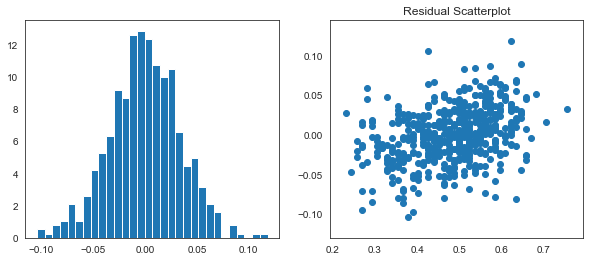

In [208]:
# check the residuals of the first model
checkresiduals(df, 'win_percentage', slr_model_1)

In [463]:
# fine-tune our independent variables by removing variables 
# with large p-values (indicating they do not have statistical significance)
features = ['faceOffsLost', 'powerPlayOpportunities',
            'savePctg', 'shotsFor','missedShots']

In [464]:
df[features].head()

,faceOffsLost,powerPlayOpportunities,savePctg,shotsFor,missedShots
teamID_seasonID,,,,,
1_19992000,2632.0,274.0,0.903,2717,1262
1_20002001,2662.0,310.0,0.904,2590,1198
1_20012002,2603.0,261.0,0.902,2445,1155
1_20022003,2467.0,303.0,0.914,2601,371
1_20032004,2497.0,312.0,0.918,2433,974


In [465]:
# run a second test model
# this model has a lower R-squared but now our variables
# are all statistically significant
slr_model_2 = sm.OLS(endog=df['win_percentage'], exog=sm.add_constant(df[features])).fit()

In [466]:
slr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         win_percentage   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     104.9
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           5.27e-76
Time:                        17:55:38   Log-Likelihood:                 657.75
No. Observations:                 516   AIC:                            -1304.
Df Residuals:                     510   BIC:                            -1278.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -5.1182      0.342    -14.979      0.000      -5.790      -4.447
faceOffsLost           -7.446e-05   1.89e-05     -3.949      0.000      -0.000   -3.74e-05
powerPlayOpportunities     0.0003   4.87e-05      6.796      0.000       0.000       0.000
savePctg                   5.6351      0.355     15.854      0.000       4.937       6.333
shotsFor                   0.0002   1.89e-05     11.058      0.000       0.000       0.000
missedShots             7.133e-05   1.82e-05      3.929      0.000    3.57e-05       0.000
==============================================================================
Omnibus:                        2.745   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                2.821
Skew:                          -0.163   Prob(JB):                        0.244
Kurtosis:                       2.843   Cond. No.                     5.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [467]:
# scale the features so that our coefficients are on the same scale
# and can be interpreted 
scaler = StandardScaler()
scaler.fit(df[features])
scaled_features = scaler.transform(df[features])

scaled_features_df = pd.DataFrame(scaled_features, columns=features, index=df.index)
scaled_features_df.head()

/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,faceOffsLost,powerPlayOpportunities,savePctg,shotsFor,missedShots
teamID_seasonID,,,,,
1_19992000,0.856535,-0.603688,-0.436947,1.585620,1.878258
1_20002001,1.031251,-0.066794,-0.325880,0.880110,1.517994
1_20012002,0.687644,-0.797567,-0.548013,0.074608,1.275943
1_20022003,-0.104400,-0.171190,0.784782,0.941217,-3.137280
1_20032004,0.070315,-0.036966,1.229047,0.007945,0.257074


In [468]:
# run a new model with same features from model 2 
# but now the features have been scaled
# R-squared should be the same as it was in model 2
scaled_features_model_2= sm.OLS(endog=df['win_percentage'], exog=sm.add_constant(scaled_features_df)).fit()

scaled_features_model_2.summary()

/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         win_percentage   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     104.9
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           5.27e-76
Time:                        17:55:42   Log-Likelihood:                 657.75
No. Observations:                 516   AIC:                            -1304.
Df Residuals:                     510   BIC:                            -1278.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4855      0.003    162.107      0.000       0.480       0.491
faceOffsLost              -0.0128      0.003     -3.949      0.000      -0.019      -0.006
powerPlayOpportunities     0.0222      0.003      6.796      0.000       0.016       0.029
savePctg                   0.0507      0.003     15.854      0.000       0.044       0.057
shotsFor                   0.0376      0.003     11.058      0.000       0.031       0.044
missedShots                0.0127      0.003      3.929      0.000       0.006       0.019
==============================================================================
Omnibus:                        2.745   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                2.821
Skew:                          -0.163   Prob(JB):                        0.244
Kurtosis:                       2.843   Cond. No.                         1.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# create a new interaction variable which is a proxy for puck possession
df['puck_possession']=df['blockedShots']*df['shotsFor']*df['missedShots']

In [477]:
# add that variable to the list of features and add back in the goal data
features = ['faceOffsLost','goalsAgainstPerGame','goalsPerGame',
           'giveaways','savePctg','puck_possession']

In [ ]:
# scale the features prior to running the next model
scaler = StandardScaler()
scaler.fit(df[features])
scaled_features = scaler.transform(df[features])

scaled_features_df = pd.DataFrame(scaled_features, columns=features, index=df.index)
scaled_features_df.head()

In [478]:
# run the third model
# the goal data has now increased the R-squared
# and all of our p-values are significant
slr_model_3 = sm.OLS(endog=df['win_percentage'], exog=sm.add_constant(df[features])).fit()

slr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         win_percentage   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     568.2
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          6.51e-222
Time:                        17:59:16   Log-Likelihood:                 1001.8
No. Observations:                 516   AIC:                            -1990.
Df Residuals:                     509   BIC:                            -1960.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3623      0.258     -1.405      0.161      -0.869       0.144
faceOffsLost        -8.595e-05   9.85e-06     -8.729      0.000      -0.000   -6.66e-05
goalsAgainstPerGame    -0.1402      0.007    -19.500      0.000      -0.154      -0.126
goalsPerGame            0.1853      0.005     36.802      0.000       0.175       0.195
giveaways           -3.298e-05   7.89e-06     -4.179      0.000   -4.85e-05   -1.75e-05
savePctg                1.0092      0.265      3.805      0.000       0.488       1.530
puck_possession      1.778e-11   2.58e-12      6.883      0.000    1.27e-11    2.29e-11
==============================================================================
Omnibus:                        2.208   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.332   Jarque-Bera (JB):                2.149
Skew:                           0.063   Prob(JB):                        0.341
Kurtosis:                       3.290   Cond. No.                     6.14e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

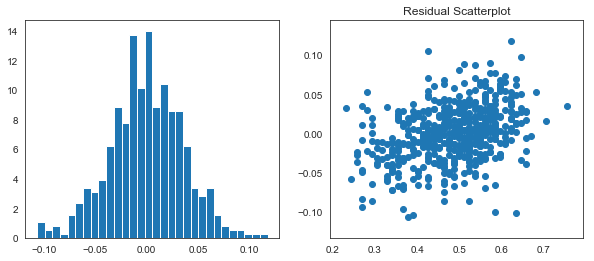

In [220]:
# check the residuals of our new third model
checkresiduals(df, 'win_percentage', slr_model_3)

In [216]:
# we noticed additional outliers in the data
# the NHL attempted to implement stronger rules against obstruction
# so a variety of the data from the 2002 season is lower than the 
# remainder of the data

# remove that season to check if it impacts our results
ixl = list(df.index)
lockout = [i for i in ixl if '20022003' in i]
df_exclude2002 = df.drop(index=lockout,axis=0)

In [217]:
df_exclude2002.head()

,evGGARatio,faceOffWinPercentage,faceOffsLost,faceOffsTaken,faceOffsWon,gamesPlayed_x,goalsAgainstPerGame,goalsPerGame,losses_x,penaltyKillPercentage,powerPlayGoals,powerPlayGoalsAgainst,powerPlayOpportunities,powerPlayPercentage,ptPctg,pts,savePctg,shootingPctg_x,shotsAllowed,shotsPerGame,winLeadFirstPer,winLeadSecondPer,winOppScoreFirst,winOutshootOpp,winOutshotByOpp,winScoreFirst,wins_x,blockedShots,giveaways,goalsFor,hits,missedShots,otLosses,points,shotsFor,takeaways,teamAbbrev,teamFullName,ties,win_percentage,Original_6,defensive_strength,puck_possession
teamID_seasonID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_19992000,0.9286,49.3,2632.0,5195.0,2563.0,82,2.476,3.061,24,87.5,55.0,39.0,274.0,20.1,62.8,103,0.903,9.2,25.6220,33.1341,0.700,0.882,0.459,0.587,0.471,0.622,45,877,984,251,2146,1262,5,103,2717,1258,NJD,New Jersey Devils,8,0.548780,0,6.052453e+09,3007104958
1_20002001,1.1969,49.4,2662.0,5259.0,2597.0,82,2.378,3.598,19,84.6,71.0,49.0,310.0,22.9,67.7,111,0.904,11.4,24.6829,31.5854,0.839,0.921,0.421,0.583,0.684,0.727,48,856,1011,295,2027,1198,3,111,2590,1015,NJD,New Jersey Devils,12,0.585366,0,4.296218e+09,2656013920
1_20012002,1.1969,49.5,2603.0,5156.0,2553.0,82,2.280,2.500,28,83.7,44.0,43.0,261.0,16.9,57.9,95,0.902,8.4,23.1707,29.8171,0.750,0.774,0.275,0.452,0.632,0.714,41,920,888,205,1983,1155,4,95,2445,898,NJD,New Jersey Devils,9,0.500000,0,3.453533e+09,2598057000
1_20032004,1.2636,49.2,2497.0,4916.0,2419.0,82,2.000,2.598,25,85.3,51.0,39.0,312.0,16.4,61.0,100,0.918,8.8,24.4024,29.6707,0.821,0.842,0.176,0.559,0.500,0.771,43,834,1073,213,928,974,2,100,2433,619,NJD,New Jersey Devils,12,0.524390,0,1.195694e+09,1976364828
1_20052006,0.9860,49.5,2369.0,4691.0,2322.0,82,2.744,2.841,27,81.9,78.0,63.0,439.0,17.8,61.6,101,0.906,9.7,29.3049,29.2073,0.844,0.886,0.389,0.543,0.512,0.696,46,989,987,233,1167,1024,9,101,2395,660,NJD,New Jersey Devils,0,0.560976,0,1.848583e+09,2425502720


In [218]:
# scale the features again with our smaller data set
scaler = StandardScaler()
scaler.fit(df_exclude2002[features])
scaled_features = scaler.transform(df_exclude2002[features])

scaled_features_df = pd.DataFrame(scaled_features, columns=features, index=df_exclude2002.index)
scaled_features_df.head()

/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,faceOffsWon,goalsAgainstPerGame,goalsPerGame,savePctg,giveaways,puck_possession
teamID_seasonID,,,,,,
1_19992000,0.462298,-0.821912,0.907002,-0.434158,1.044840,0.814376
1_20002001,0.650271,-1.114372,2.569765,-0.323580,1.178368,0.153072
1_20012002,0.407012,-1.406832,-0.830075,-0.544737,0.570076,0.043906
1_20032004,-0.333825,-2.242430,-0.526628,1.224526,1.484986,-1.127093
1_20052006,-0.870102,-0.022125,0.225796,-0.102422,1.059677,-0.281111


In [131]:
# run a model excluding the 2002 season
# the data was immaterially impacted
# so we chose to keep it
scaled_features_model_exclude2002 = sm.OLS(endog=df['win_percentage'], exog=sm.add_constant(scaled_features_df)).fit()

scaled_features_model_exclude2002.summary()

/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         win_percentage   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     475.5
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          1.29e-198
Time:                        15:56:08   Log-Likelihood:                 925.53
No. Observations:                 488   AIC:                            -1837.
Df Residuals:                     481   BIC:                            -1808.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4881      0.002    294.762      0.000       0.485       0.491
faceOffsWon            -0.0105      0.002     -5.855      0.000      -0.014      -0.007
goalsAgainstPerGame    -0.0524      0.003    -20.096      0.000      -0.058      -0.047
goalsPerGame            0.0596      0.002     31.406      0.000       0.056       0.063
savePctg                0.0058      0.003      2.235      0.026       0.001       0.011
giveaways              -0.0079      0.002     -4.401      0.000      -0.011      -0.004
puck_possession         0.0112      0.002      5.888      0.000       0.007       0.015
==============================================================================
Omnibus:                        1.895   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.801
Skew:                          -0.047   Prob(JB):                        0.406
Kurtosis:                       3.283   Cond. No.                         2.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

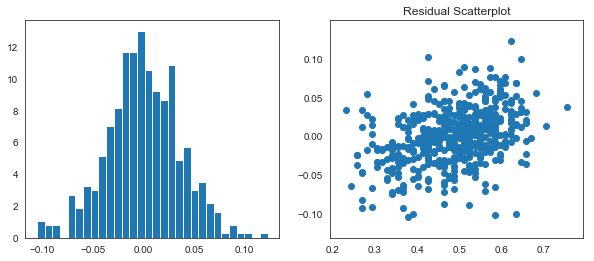

In [221]:
checkresiduals(df_exclude2002, 'win_percentage', scaled_features_model_exclude2002)